In [44]:
import autofit as af
import autolens as al
import autolens.plot as aplt
from mpdaf.obj import Image
import numpy as np

In [45]:
data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens_tests/autolens_workspace/Test_3/Simulation_data/" 

In [46]:
img   = Image(data_folder+"arcs_simulation.fits")
noise = Image(data_folder+"noise_simulation.fits")

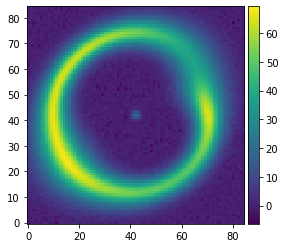

In [47]:
sn_map = img/noise
sn_map.plot(colorbar='v')

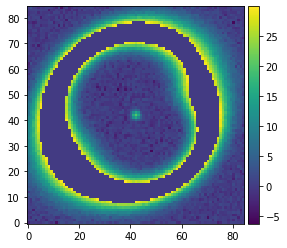

In [58]:
mask = sn_map.data.data < 30
new_mask = sn_map * mask
new_mask.plot(colorbar='v')

In [59]:
new_mask.data.data[np.where(new_mask.data.data != 0)] = 1

In [60]:
new_mask.write(data_folder+"new_mask.fits")

# Testing new mask

In [61]:
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

In [62]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{data_folder}/new_mask.fits", hdu=1, pixel_scales=imaging.pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

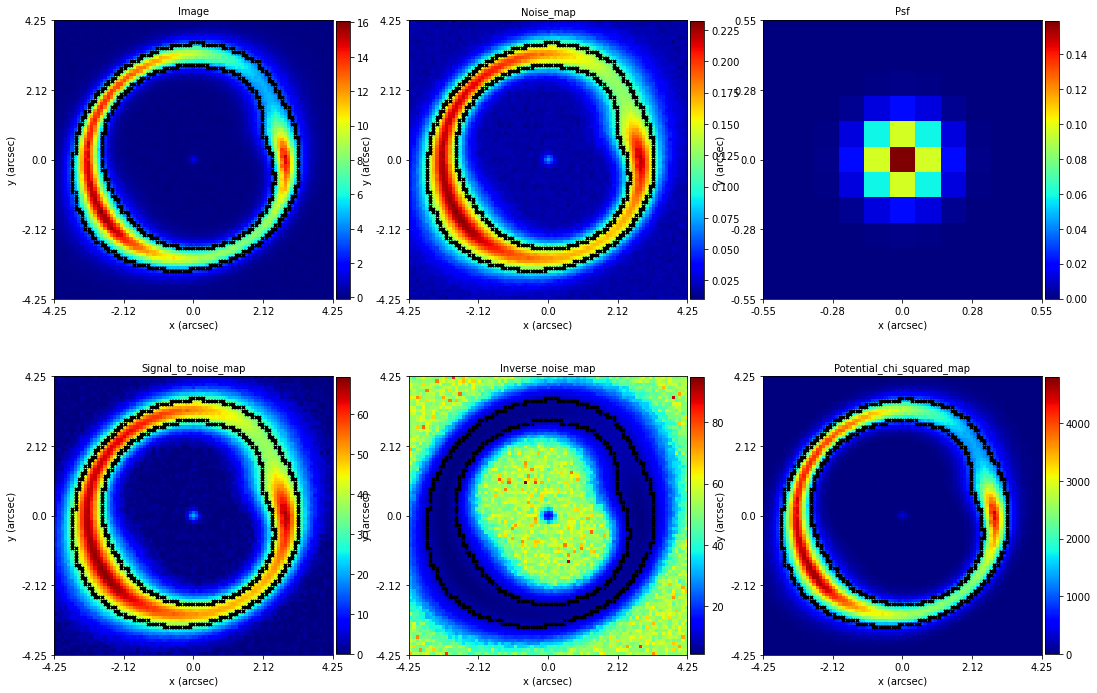

In [63]:
#Plot
%matplotlib inline

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),
)

In [32]:
masked_imaging.grid.shape

(1703, 2)